In [2]:
import opendatasets as od

dataset = 'https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data'
od.download(dataset)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification


100%|██████████| 1.21G/1.21G [00:26<00:00, 48.9MB/s]


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# librosa
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [12]:
import os

general_path = 'Audio Genre Classification/Data'

# List all genres in the dataset
genres = os.listdir(f'{general_path}/genres_original/')
print("Genres available in the dataset:", genres)

Genres available in the dataset: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [19]:
y, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

print('Check Len of Audio:', 661794 / 22050)

audio_file, _ = librosa.effects.trim(y)

print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332
Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


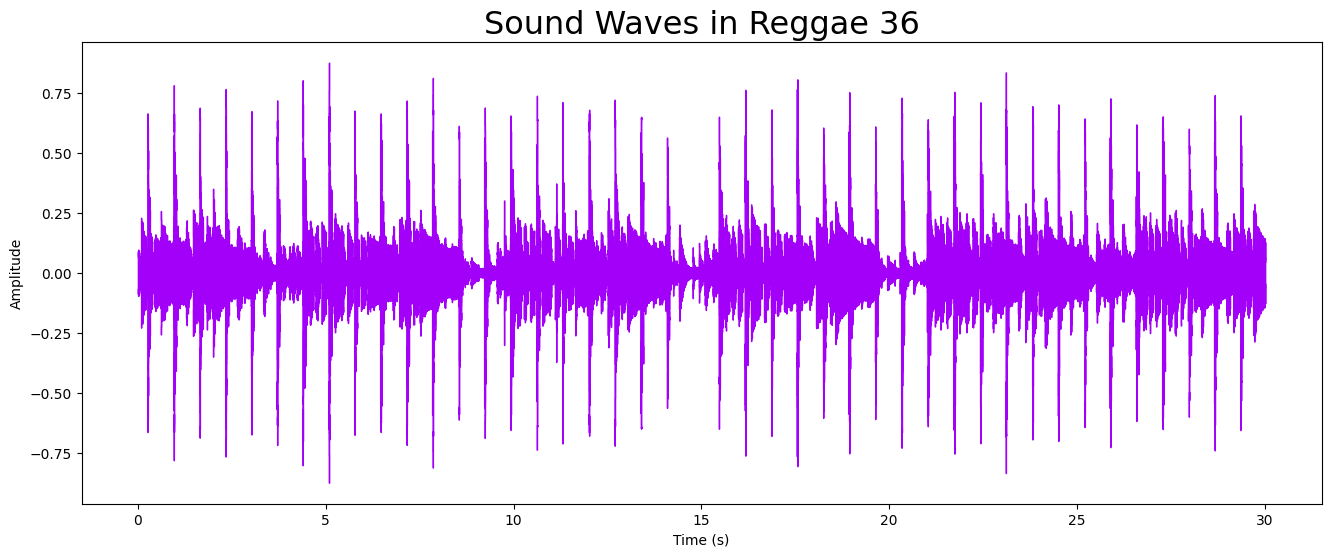

In [23]:
# Plot the waveform of the audio file
plt.figure(figsize=(16, 6))
librosa.display.waveshow(audio_file, sr=sr, color="#A300F9")
plt.title("Sound Waves in Reggae 36", fontsize=23)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [24]:
# Short-time Fourier transform (STFT) parameters
n_fft = 2048  # Number of samples in each FFT window
hop_length = 512  # Number of samples between successive frames

# Compute the Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length))

# Print the shape of the STFT matrix
print('Shape of D object (STFT matrix):', np.shape(D))

Shape of D object (STFT matrix): (1025, 1293)


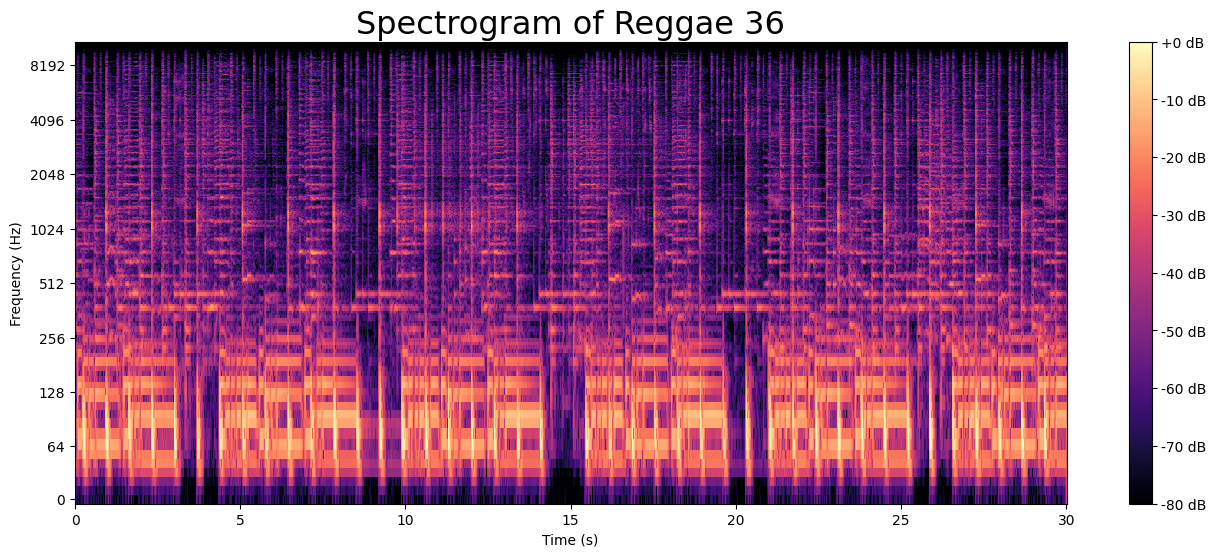

In [25]:
# Visualize the STFT as a spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='log', cmap='magma')
plt.title("Spectrogram of Reggae 36", fontsize=23)
plt.colorbar(format="%+2.0f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()